In [1]:
import numpy as np
import mrcfile
from matplotlib import pyplot as plt
%matplotlib inline
import collections
import tensorflow as tf
from tensorflow import spectral
from relion_fixed_it import load_star
from ClassFiles.Framework import AdversarialRegulariser 

In [2]:
base_path = '/local/scratch/public/sl767/SPA/playing2/'
path=base_path+'Refine3D/1Q9J/1Q9J_mult005_it013_class001_external_reconstruct.star'

In [3]:
file=load_star(path)

In [4]:
with mrcfile.open(base_path+file['external_reconstruct_general']['rlnExtReconsDataReal']) as mrc:
    data_real = mrc.data
with mrcfile.open(base_path+file['external_reconstruct_general']['rlnExtReconsDataImag']) as mrc:
    data_im = mrc.data
with mrcfile.open(base_path+file['external_reconstruct_general']['rlnExtReconsWeight']) as mrc:
    kernel = mrc.data

In [5]:
complex_data = data_real + 1j * data_im

In [6]:
target_path = base_path+file['external_reconstruct_general']['rlnExtReconsResult']

In [7]:
REGULARIZATION=.03
set_off=REGULARIZATION*kernel.mean()
reg_kernel = kernel+set_off

In [8]:
# Initial guess for iterative algorithm
reco = np.divide(complex_data,reg_kernel)

Build visualization tool

In [9]:
def vis(data):
    im = np.fft.fftshift(np.fft.irfftn(data))
    plt.imshow(im[...,45])

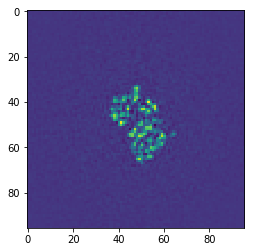

In [10]:
vis(reco)

In [11]:
saves_path = '/local/scratch/public/sl767/SPA/Saves/Saves/PDB/Adversarial_Regulariser/LowPassFiltering'
regularizer = AdversarialRegulariser(saves_path)

LookupError: No gradient defined for operation 'irfft3d_1' (op type: IRFFT3D)

In [ ]:
STEP_SIZE=0.1
def update(image):
    norm = np.sqrt(np.mean(np.square(image)))
    image = image/norm
    grad = regularizer.evaluate(np.expand_dims(np.expand_dims(image, axis=0), axis=-1))[0,...,0]
    image = image - STEP_SIZE*grad
    return image*norm

In [ ]:
update(reco)
vis(reco)